In [188]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#### Домашняя работа

В этом датасете содержатся данные по средней годовой смертности на 100000 населения и концентрации кальция в питьевой воде для 61 большого города в Англии и Уэльсе. Города дополнительно поделены на северные и южные.


1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью? 
* a. Построить точечный график 
* b. Рассчитать коэффициенты корреляции Пирсона и Спирмена 
* c. Построить модель линейной регрессии 
* d. Рассчитать коэффициент детерминации 
* e. Вывести график остатков

2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности? 
* a. Разделить данные на 2 группы 
* b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [189]:
wt = pd.read_csv('water.csv')

water = pd.read_csv('water.csv')
water = water.drop(['Unnamed: 0'], axis=1)
water

# water.describe()


,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

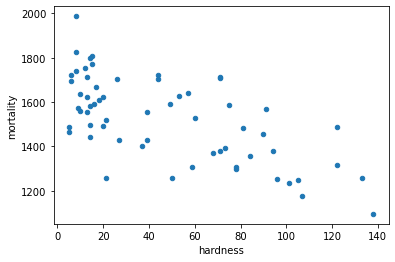

In [190]:
water.plot(kind='scatter', x='hardness', y='mortality')

In [191]:
water.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [192]:
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [193]:
water[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [194]:
X = water[['hardness']]
y = water['mortality']

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [196]:
X_train.shape

(42, 1)

In [197]:
y_train.shape

(42,)

In [198]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [199]:
model.coef_ # коэф-т "a" y=ax + b

array([-3.13167087])

In [200]:
model.intercept_ # коэф-т 'b' y=ax + b

1668.9722977277095

In [201]:
y_pred = model.predict(X_test) # predict-модель по итогам обучения модели
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [202]:
model.score(X_test, y_test) 
# коэффициента детерминации - чуть выше среднего. Наша модель еще далека от идеала.

0.5046490611017092

In [203]:
model.fit(X_test, y_test) 

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

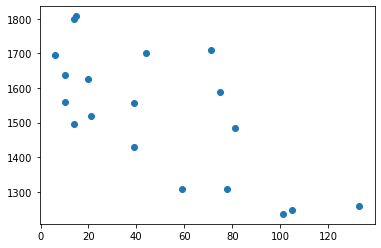

In [204]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r') 

In [205]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_const)
results = model.fit()

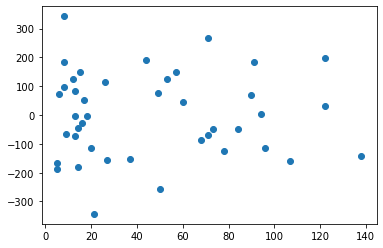

In [207]:
plt.scatter(X_const.iloc[:, 1], results.resid) # график остатков

#### 2-я часть North

In [208]:
north = water[(water['location']=='North')]
north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


<AxesSubplot:xlabel='hardness', ylabel='mortality'>

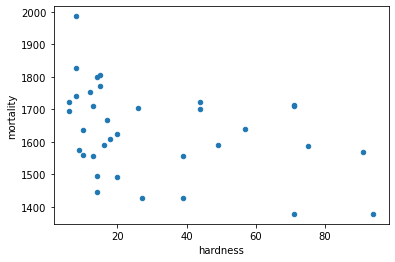

In [209]:
north.plot(kind='scatter', x='hardness', y='mortality')

In [210]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [211]:
north[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [212]:
x = north[['hardness']]
Y = north['mortality']

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.30, random_state=42)

In [213]:
model_2 = LinearRegression()
model_2.fit(x_train, Y_train)

LinearRegression()

In [214]:
model_2.coef_ # коэф-т "a" y=ax + b

array([-1.97686226])

In [215]:
model_2.intercept_ # коэф-т 'b' y=ax + b

1688.150229031281

In [216]:
y_pred_2 = model_2.predict(x_test) # predict-модель по итогам обучения модели
y_pred_2

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [217]:
model_2.score(x_test, Y_test) 
# коэффициента детерминации - ниже среднего. Требует доработки.

0.018885304285745863

In [218]:
model_2.fit(x_test, Y_test) 

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

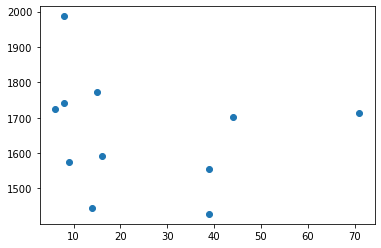

In [219]:
plt.scatter(x_test, Y_test)
plt.plot(x_test, y_pred_2, c='r') 

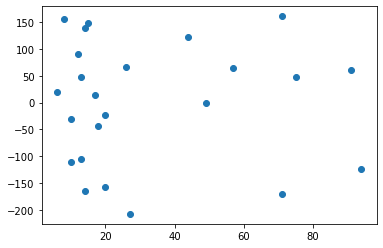

In [220]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.30, random_state=42)
x_const = sm.add_constant(x_train)
model_2_ = sm.OLS(Y_train, x_const)
results_2 = model_2_.fit()

plt.scatter(x_const.iloc[:, 1], results_2.resid) # график остатков

(array([1., 3., 3., 0., 3., 2., 3., 3., 2., 4.]),
 array([-207.77494801, -170.87675407, -133.97856012,  -97.08036618,
         -60.18217223,  -23.28397829,   13.61421566,   50.5124096 ,
          87.41060354,  124.30879749,  161.20699143]),
 <BarContainer object of 10 artists>)

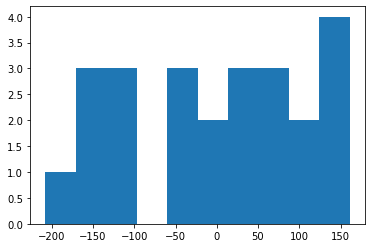

In [233]:
plt.hist(results_2.resid)

#### 2-я часть South

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

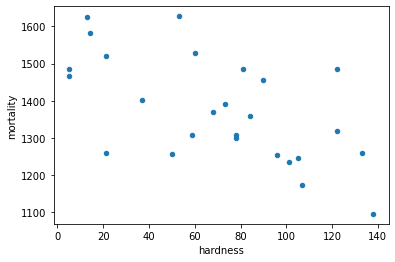

In [221]:
south = water[(water['location']=='South')]
# south.info()
south.plot(kind='scatter', x='hardness', y='mortality')

In [222]:
south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [223]:
south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [224]:
x = south[['hardness']]
y = south['mortality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

model_3 = LinearRegression()
model_3.fit(x_train, y_train)

LinearRegression()

In [225]:
model_3.coef_ # коэф-т "a" y=ax + b

array([-3.51342921])

In [226]:
model_3.intercept_ # коэф-т 'b' y=ax + b

1640.2204603423374

In [227]:
y_pred_3 = model_3.predict(x_test) # predict-модель по итогам обучения модели
y_pred_3

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [228]:
model_3.score(x_test, y_test) 
# коэффициента детерминации - отрицательный, скорее всего из-за того, что данных мало или модель подобрана не правильно.

-2.5519223012352077

In [229]:
model_3.fit(x_test, y_test)

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

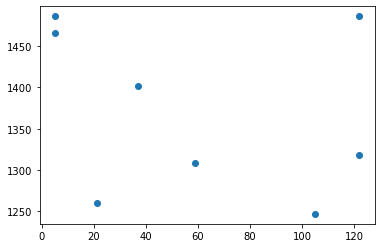

In [230]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_3, c='r') 

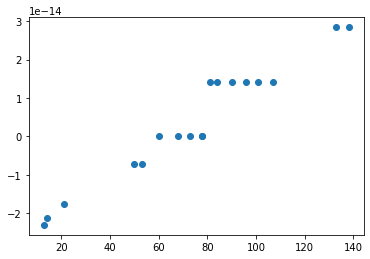

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_const_ = sm.add_constant(x_train)
model_3_ = sm.OLS(x_train, x_const_)
results_3 = model_3_.fit()

plt.scatter(x_const_.iloc[:, 1], results_3.resid) # график остатков

# Остатки распределени не нормальное. Модель подобрана не правильно

(array([2., 1., 0., 2., 5., 0., 0., 6., 0., 2.]),
 array([-2.30926389e-14, -1.79412041e-14, -1.27897692e-14, -7.63833441e-15,
        -2.48689958e-15,  2.66453526e-15,  7.81597009e-15,  1.29674049e-14,
         1.81188398e-14,  2.32702746e-14,  2.84217094e-14]),
 <BarContainer object of 10 artists>)

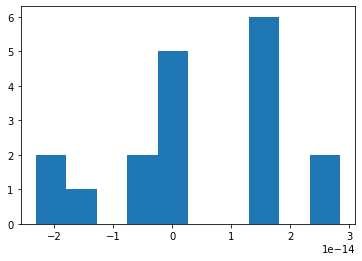

In [232]:
plt.hist(results_3.resid)